In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("PM10_PM25_ylityspäivät_2024.csv")
df.head(5)

,Päivämäärä,Mittausverkko,Mittauspaikka,Komponentti,Pitoisuus
0,23.05.2024,Helsingin seudun verkko (HSY),Espoo Luukki,PM10 24h,61
1,23.05.2024,Helsingin seudun verkko (HSY),Helsinki Mannerheimintie,PM10 24h,58
2,22.05.2024,Helsingin seudun verkko (HSY),Helsinki Mannerheimintie,PM10 24h,80
3,18.05.2024,Oulun verkko,Oulu keskusta 2,PM10 24h,53
4,16.05.2024,Turun seudun verkko,Parainen,PM10 24h,51


In [6]:
import matplotlib.pyplot as plt

kaarina = df[df["Mittauspaikka"] == "Kaarina Kaarina"]
kaarina

,Päivämäärä,Mittausverkko,Mittauspaikka,Komponentti,Pitoisuus
102,26.03.2024,Turun seudun verkko,Kaarina Kaarina,PM10 24h,61
115,25.03.2024,Turun seudun verkko,Kaarina Kaarina,PM10 24h,72
175,12.03.2024,Turun seudun verkko,Kaarina Kaarina,PM10 24h,68
192,11.03.2024,Turun seudun verkko,Kaarina Kaarina,PM10 24h,72


In [7]:
imatra = df[df["Mittauspaikka"] == "Imatra Teppanala"]
imatra

,Päivämäärä,Mittausverkko,Mittauspaikka,Komponentti,Pitoisuus


In [8]:
print(f"Pienin ylitys PM2.5: {df['Pitoisuus'][df['Komponentti'] == 'PM2.5 24h'].min()}")
print(f"Pienin ylitys PM10: {df['Pitoisuus'][df['Komponentti'] == 'PM10 24h'].min()}")

print(f"Suurin ylitys PM2.5: {df['Pitoisuus'][df['Komponentti'] == 'PM2.5 24h'].min()}")
print(f"Suurin ylitys PM10: {df['Pitoisuus'][df['Komponentti'] == 'PM10 24h'].min()}")

print(f"Keskimääräinen ylitys PM2.5: {df['Pitoisuus'][df['Komponentti'] == 'PM2.5 24h'].mean()}")
print(f"Keskimääräinen ylitys PM10: {df['Pitoisuus'][df['Komponentti'] == 'PM10 24h'].mean()}")

Pienin ylitys PM2.5: 16
Pienin ylitys PM10: 51
Suurin ylitys PM2.5: 16
Suurin ylitys PM10: 51
Keskimääräinen ylitys PM2.5: 19.95798319327731
Keskimääräinen ylitys PM10: 74.27835051546391


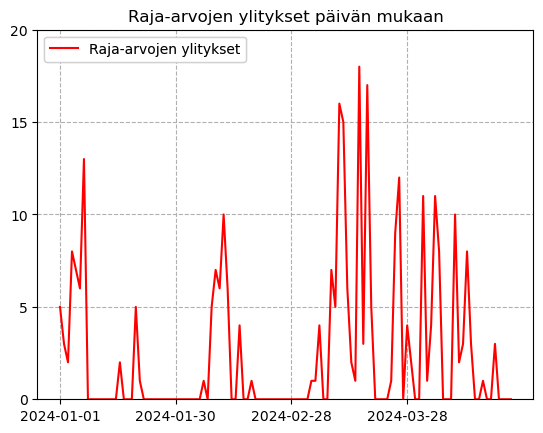

In [9]:
# plt.plot(df["Päivämäärä"].value_counts())


idx = pd.date_range('01-01-2024', '04-23-2024')
df["Date"] = pd.to_datetime(df["Päivämäärä"], dayfirst=True)

day_counts = df.value_counts("Date").sort_index()
day_counts.index = pd.DatetimeIndex(day_counts.index)

day_counts = day_counts.reindex(idx, fill_value=0)


fig, ax = plt.subplots()

ax.plot(day_counts, label="Raja-arvojen ylitykset", color="red")

legend = ax.legend(loc='upper left')

ax.add_artist(legend)
ax.grid(linestyle="dashed")

xticks = day_counts.index
ax.set_xticks(xticks)

ax.set_ylim(0,20)
plt.title("Raja-arvojen ylitykset päivän mukaan")
plt.locator_params(axis='both', nbins=4) 
plt.show()



In [10]:
# Toistuvimmat ylityspäivät PM10
df[df['Komponentti'] == 'PM10 24h'].value_counts("Date").head(5)

Date
2024-03-11    13
2024-03-18    12
2024-03-12    12
2024-03-26    10
2024-04-09    10
Name: count, dtype: int64

In [11]:
# Toistuvimmat ylityspäivät PM2.5
df[df['Komponentti'] == 'PM2.5 24h'].value_counts("Date").head(5)

Date
2024-03-16    18
2024-01-07    12
2024-02-11     9
2024-02-10     5
2024-04-01     5
Name: count, dtype: int64

In [12]:
#Mittauspaikat joilla eniten ylityksiä
df["Mittauspaikka"].value_counts().head(10)

Mittauspaikka
Vantaa Hämeenlinnanväylä       18
Pori Paanakedonkatu            18
Pietarsaari Bottenviksvägen    16
Helsinki Mäkelänkatu           16
Kuopio Tasavallankatu          16
Kuopio Savilahti KYS           15
Kuopio Maaherrankatu           14
Siilinjärvi Sorakuja           14
Helsinki Teollisuuskatu        13
Jyväskylä Jyskä                 9
Name: count, dtype: int64

In [13]:
df.head(5)

,Päivämäärä,Mittausverkko,Mittauspaikka,Komponentti,Pitoisuus,Date
0,23.05.2024,Helsingin seudun verkko (HSY),Espoo Luukki,PM10 24h,61,2024-05-23
1,23.05.2024,Helsingin seudun verkko (HSY),Helsinki Mannerheimintie,PM10 24h,58,2024-05-23
2,22.05.2024,Helsingin seudun verkko (HSY),Helsinki Mannerheimintie,PM10 24h,80,2024-05-22
3,18.05.2024,Oulun verkko,Oulu keskusta 2,PM10 24h,53,2024-05-18
4,16.05.2024,Turun seudun verkko,Parainen,PM10 24h,51,2024-05-16


In [14]:
# Havaintoasemat dataframe 

stations = pd.read_csv("../data/parsed_stations.csv", delimiter=";")

In [15]:
import warnings
warnings.filterwarnings('ignore')
stations["Count(PM10)"] = 0
stations["Count(PM2.5)"] = 0

for i in range(len(stations)):
    countPM10 = 0
    countPM25 = 0
    for x in range(len(df)):
        if (stations["Nimi"].iloc[i] == df["Mittauspaikka"].iloc[x]) & (df["Komponentti"].iloc[x] == "PM10 24h"):
            countPM10 = countPM10 + 1
        if (stations["Nimi"].iloc[i] == df["Mittauspaikka"].iloc[x]) & (df["Komponentti"].iloc[x] == "PM2.5 24h"):
            countPM25 = countPM25 + 1
    stations["Count(PM10)"].iloc[i] = countPM10
    stations["Count(PM2.5)"].iloc[i] = countPM25

In [16]:
stations.sort_values("Count(PM10)", ascending=False).head(5)

,Nimi,FMSID,LPNN,WMO,Lat,Lon,Korkeus,Ryhmät,Alkaen,Count(PM10),Count(PM2.5)
154,Vantaa Hämeenlinnanväylä,104083,NaN,NaN,60.27,24.87,29.0,ilmanlaatu (kaupungit),2015,13,5
37,Helsinki Mäkelänkatu,100762,NaN,NaN,60.20,24.95,25.0,ilmanlaatu (kaupungit),2015,11,5
87,Kuopio Savilahti KYS,106954,NaN,NaN,62.90,27.65,102.0,ilmanlaatu (kaupungit),2019,11,4
117,Pori Paanakedonkatu,106420,NaN,NaN,61.48,21.81,2.0,ilmanlaatu (kaupungit),2016,11,7
141,Siilinjärvi Sorakuja,104017,NaN,NaN,63.07,27.66,NaN,ilmanlaatu (kaupungit),2002,10,4


In [17]:
stations.sort_values("Count(PM2.5)", ascending=False).head(5)

,Nimi,FMSID,LPNN,WMO,Lat,Lon,Korkeus,Ryhmät,Alkaen,Count(PM10),Count(PM2.5)
117,Pori Paanakedonkatu,106420,NaN,NaN,61.48,21.81,2.0,ilmanlaatu (kaupungit),2016,11,7
116,Pietarsaari Bottenviksvägen,103152,NaN,NaN,63.68,22.72,8.0,ilmanlaatu (kaupungit),1994,9,7
89,Kuopio Tasavallankatu,103095,NaN,NaN,62.88,27.66,NaN,ilmanlaatu (kaupungit),2009,10,6
59,Jyväskylä Jyskä,107401,NaN,NaN,62.24,25.84,88.0,ilmanlaatu (kaupungit),2022,3,6
85,Kuopio Maaherrankatu,103093,NaN,NaN,62.89,27.69,NaN,ilmanlaatu (kaupungit),2004,9,5


In [18]:
#Korrelaatio raja-arvojen ylityksessä
print(f"Pearson: {stations['Count(PM10)'].corr(stations['Count(PM2.5)'], method='pearson')}")
print(f"Kendall: {stations['Count(PM10)'].corr(stations['Count(PM2.5)'], method='kendall')}")
print(f"Spearman: {stations['Count(PM10)'].corr(stations['Count(PM2.5)'], method='spearman')}")
#Kohtalainen korrelaatio

Pearson: 0.6847897781704697
Kendall: 0.5102450655088079
Spearman: 0.5517595362392933


In [19]:
import geopandas as gpd
from shapely.geometry import Point

In [20]:
finland = gpd.read_file('../data/suomi.geojson')
geometry = [Point(lon, lat) for lon, lat in zip(stations['Lon'], stations['Lat'])]
gdf = gpd.GeoDataFrame(stations, geometry=geometry, crs="EPSG:4326")


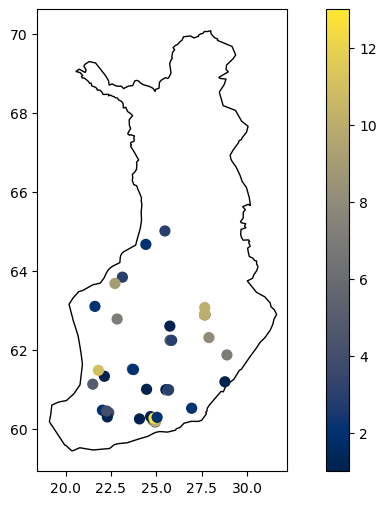

In [21]:
#Yksi tai useampi raja-arvon ylitys
ax = finland.plot(figsize=(10, 6), color='white', edgecolor='black')
one_or_more = gdf.loc[gdf["Count(PM10)"] >= 1]
one_or_more.plot(ax=ax,markersize=50, column="Count(PM10)", cmap="cividis", legend=True)
plt.show()

In [22]:
# Koordinaatit osaksi ylitysdataa

df["Lon"] = 0
df["Lat"] = 0

for i in range(len(df)):
    for x in range(len(stations)):
        if df["Mittauspaikka"].iloc[i] == stations["Nimi"].iloc[x]:
            df["Lon"].iloc[i] = stations["Lon"].iloc[x]
            df["Lat"].iloc[i] = stations["Lat"].iloc[x]

df.head()

,Päivämäärä,Mittausverkko,Mittauspaikka,Komponentti,Pitoisuus,Date,Lon,Lat
0,23.05.2024,Helsingin seudun verkko (HSY),Espoo Luukki,PM10 24h,61,2024-05-23,24.68,60.31
1,23.05.2024,Helsingin seudun verkko (HSY),Helsinki Mannerheimintie,PM10 24h,58,2024-05-23,24.94,60.17
2,22.05.2024,Helsingin seudun verkko (HSY),Helsinki Mannerheimintie,PM10 24h,80,2024-05-22,24.94,60.17
3,18.05.2024,Oulun verkko,Oulu keskusta 2,PM10 24h,53,2024-05-18,25.47,65.01
4,16.05.2024,Turun seudun verkko,Parainen,PM10 24h,51,2024-05-16,22.30,60.30


In [23]:
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf2 = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

In [24]:
gdf2

,Päivämäärä,Mittausverkko,Mittauspaikka,Komponentti,Pitoisuus,Date,Lon,Lat,geometry
0,23.05.2024,Helsingin seudun verkko (HSY),Espoo Luukki,PM10 24h,61,2024-05-23,24.68,60.31,POINT (24.68000 60.31000)
1,23.05.2024,Helsingin seudun verkko (HSY),Helsinki Mannerheimintie,PM10 24h,58,2024-05-23,24.94,60.17,POINT (24.94000 60.17000)
2,22.05.2024,Helsingin seudun verkko (HSY),Helsinki Mannerheimintie,PM10 24h,80,2024-05-22,24.94,60.17,POINT (24.94000 60.17000)
3,18.05.2024,Oulun verkko,Oulu keskusta 2,PM10 24h,53,2024-05-18,25.47,65.01,POINT (25.47000 65.01000)
4,16.05.2024,Turun seudun verkko,Parainen,PM10 24h,51,2024-05-16,22.30,60.30,POINT (22.30000 60.30000)
...,...,...,...,...,...,...,...,...,...
308,01.01.2024,Jyväskylän verkko,Jyväskylä Jyskä,PM2.5 24h,19,2024-01-01,25.84,62.24,POINT (25.84000 62.24000)
309,01.01.2024,Kemin verkko,Kemi Biotuotetehdas,PM2.5 24h,20,2024-01-01,24.54,65.76,POINT (24.54000 65.76000)
310,01.01.2024,Porin verkko,Pori Paanakedonkatu,PM2.5 24h,24,2024-01-01,21.81,61.48,POINT (21.81000 61.48000)
311,01.01.2024,Rovaniemen verkko,Rovaniemi Rovakatu,PM2.5 24h,18,2024-01-01,25.73,66.50,POINT (25.73000 66.50000)


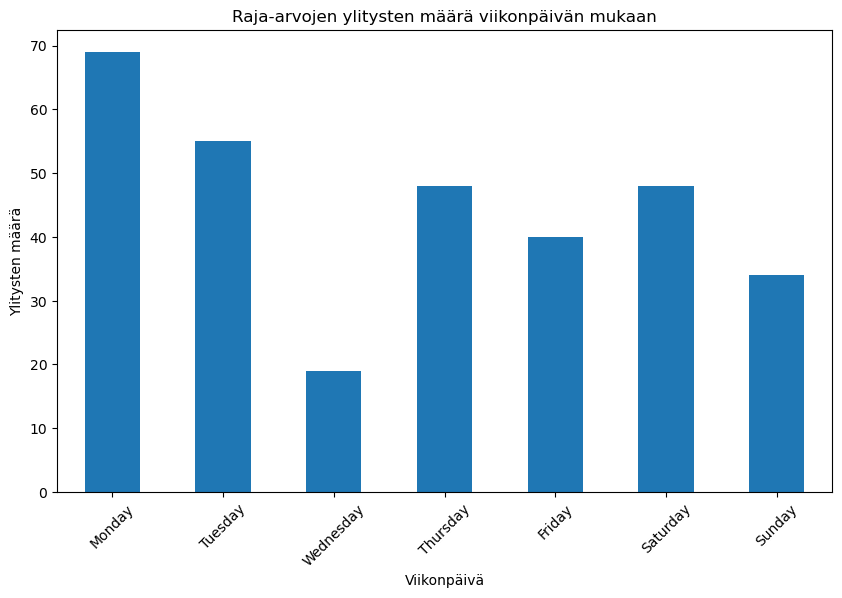

In [33]:
# Extract the weekday (0=Monday, 6=Sunday)
df['weekday'] = df['Date'].dt.dayofweek


weekday_counts = df['Date'].dt.day_name().value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='bar')
plt.title('Raja-arvojen ylitysten määrä viikonpäivän mukaan')
plt.xlabel('Viikonpäivä')
plt.ylabel('Ylitysten määrä')
plt.xticks(rotation=45)
plt.show()